## Ana Luisa Gonzalez del Rosal
### A01566927

# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [7]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Importing data

In [8]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta = "C:/Users/Ana del Rosal/Documents/School/semanaTec/TC1002S/"

In [9]:
# url string that hosts our .csv file
url = Ruta + "NotebooksProfessor/datasets/cartwheel/cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url)



# Exploring the content of the data set

Get a general 'feel' of the data


In [10]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56.0,F,1,Y,1,62.0,61.0,79,Y,1.0,7
1,2,26.0,F,1,Y,1,62.0,60.0,70,Y,1.0,8
2,3,33.0,F,1,Y,1,66.0,64.0,85,Y,1.0,7
3,4,39.0,F,1,N,0,64.0,63.0,87,Y,1.0,10
4,5,27.0,M,2,N,0,73.0,75.0,72,N,0.0,4


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [15]:
# Number of times that each distinct value of a variable occurs in a data set

print(df.Gender.value_counts(), '\n')
print(df.Glasses.value_counts(), '\n')
print(df.Age.value_counts(), '\n')
print(df.Complete.value_counts(), '\n')

Gender
F    26
M    26
Name: count, dtype: int64 

Glasses
Y    26
N    26
Name: count, dtype: int64 

Age
26.0    7
27.0    7
24.0    5
28.0    5
23.0    5
30.0    4
25.0    4
33.0    3
39.0    2
29.0    2
31.0    2
38.0    2
56.0    1
22.0    1
32.0    1
Name: count, dtype: int64 

Complete
Y    44
N     8
Name: count, dtype: int64 



In [ ]:
# Proportion of each distinct value of a variable occurs in a data set



Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [19]:
# Total number of observations

print("Total number of observations: ", df.shape[0] )


# Total number of null observations
print("Total number of null observations: ", df.Age.isnull().sum())


# Total number of counts (excluding missing values)
print("Total number (excluding missing values): ", df.Age.notnull().sum())





Total number of observations:  52
Total number of null observations:  1
Total number (excluding missing values):  51


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

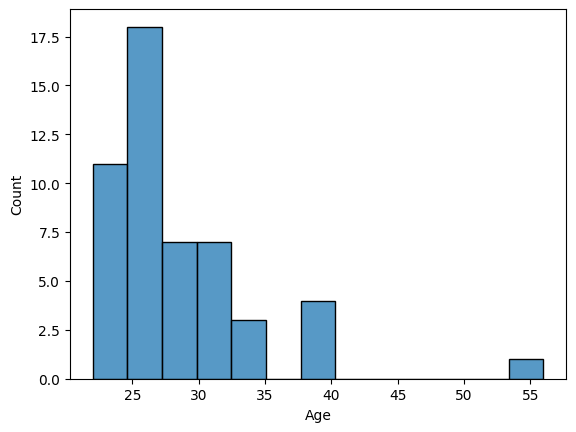

In [6]:
# Plot histogram of the total bill only
#kde true
sb.histplot(df.Age)
plt.show()

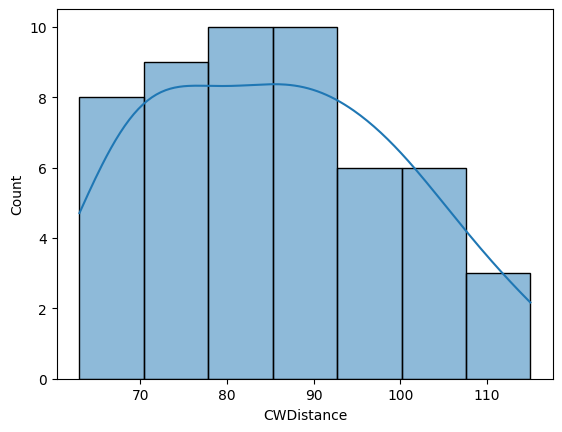

In [18]:
# Plot distribution of the tips only

sns.histplot(df.CWDistance, kde = True)
plt.show()

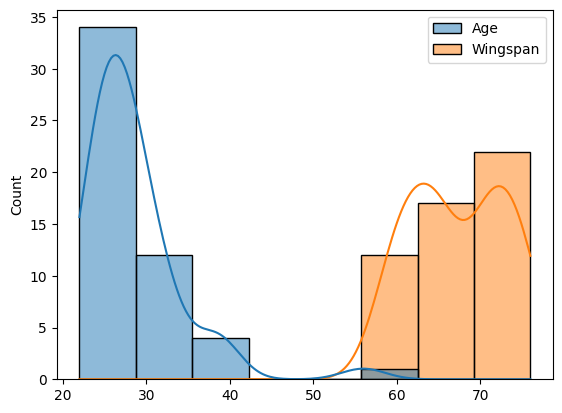

In [16]:
# Plot histogram of both the Age and the Wingspan

df2plot = df[["Age", "Wingspan"]]
sns.histplot(df2plot, kde = True)
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

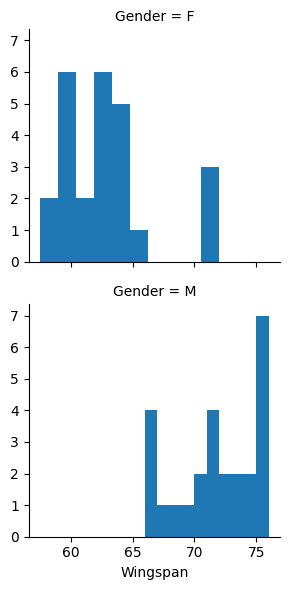

In [23]:
# Create histograms of the "Wingspan" grouped by "Gender"

g= sns.FacetGrid(df, row='Gender')
g = g.map(plt.hist, "Wingspan")
plt.show()

# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

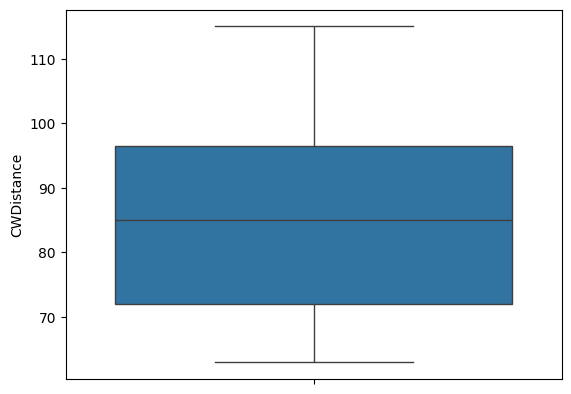

In [25]:
# Create the boxplot of the "total bill" amounts

sns.boxplot(df["CWDistance"])
plt.show()

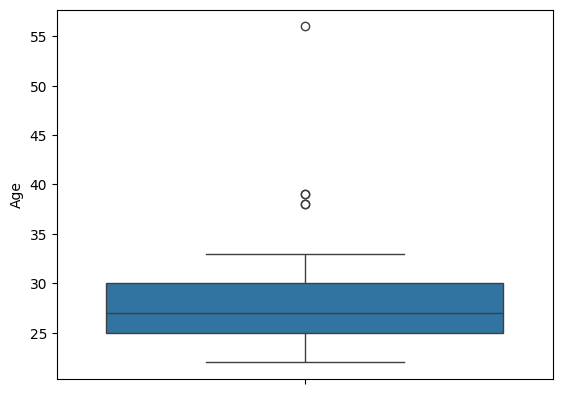

In [26]:
# Create the boxplot of the "tips" amounts

sns.boxplot(df["Age"])
plt.show()

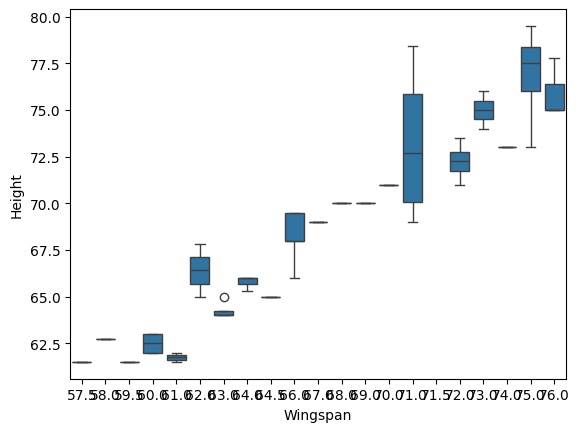

In [31]:
# Create the boxplots of the "Wingspan" and of the "Height" amounts

sns.boxplot(data = df, x= "Wingspan", y= "Height")
plt.show()

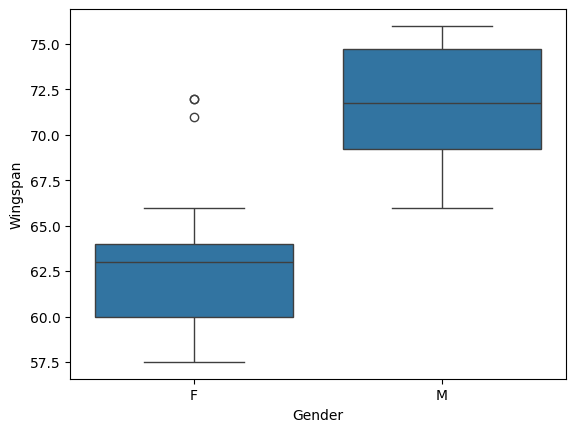

In [29]:
# Create the boxplots of the "Wingspan" and of the "tips" amounts

sns.boxplot(data = df, x= "Gender", y= "Wingspan")
plt.show()

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

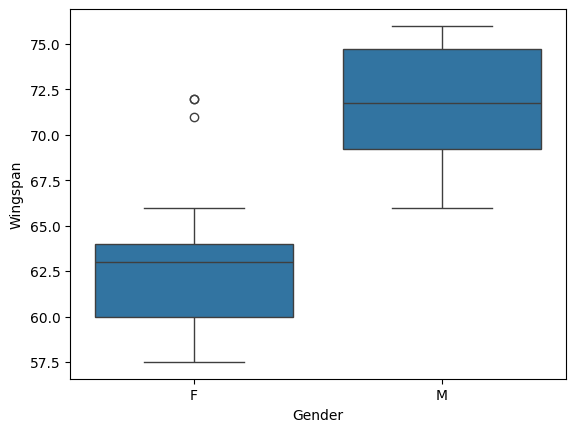

In [70]:
# Create side-by-side boxplots of the "Height" grouped by "Gender"


sns.boxplot(data = df, x= "Gender", y= "Wingspan")
plt.show()

# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


In [ ]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"



# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

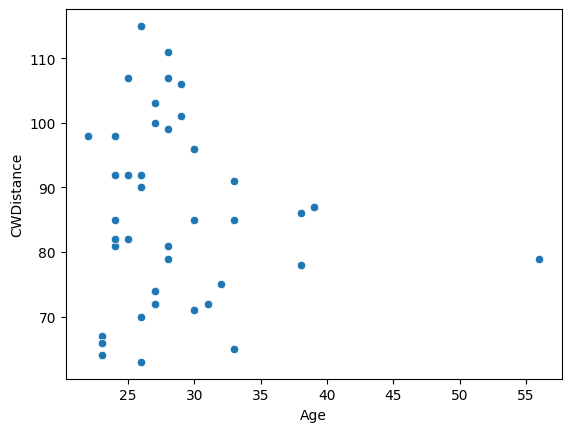

In [36]:
# scatter plot between two variables

sns.scatterplot(data = df, x = "Age", y= "CWDistance")
plt.show()

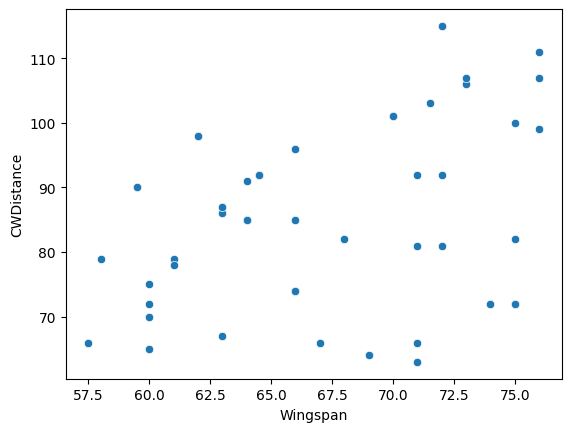

In [40]:
# scatter plot between two variables (one categorical)

sns.scatterplot(data = df, x = "Wingspan", y= "CWDistance")
plt.show()

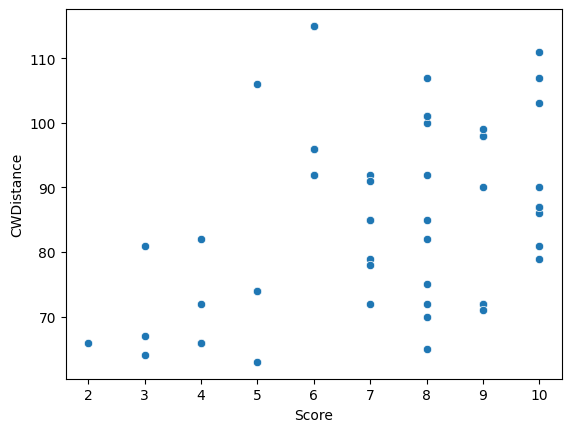

In [47]:
# scatter plot between two variables (one categorical)

sns.scatterplot(data = df, x = "Score", y= "CWDistance")
plt.show()

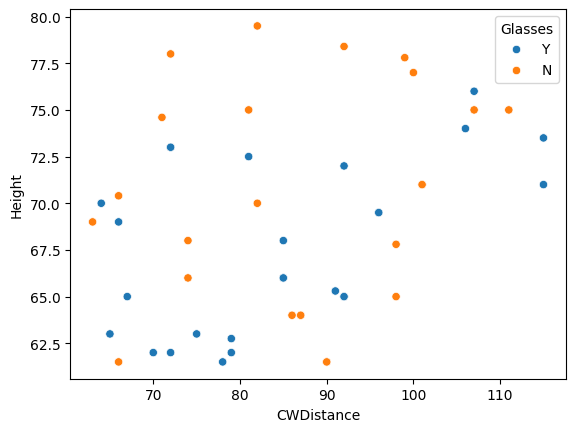

In [48]:
# scatter plot between two variables grouped according to a categorical variable


sns.scatterplot(data = df, x = "CWDistance", y= "Height", hue = "Glasses")
plt.show()

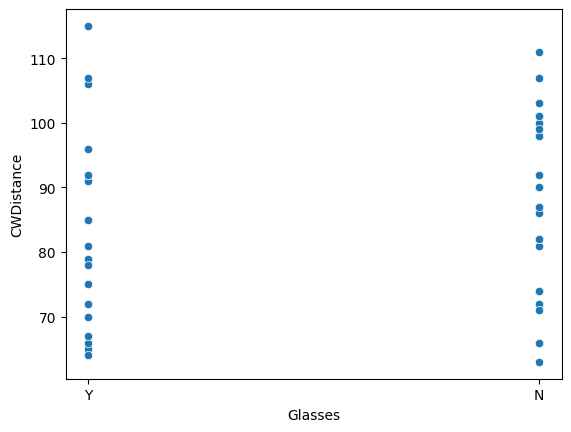

In [49]:
# scatter plot between two variables (one categorical)

sns.scatterplot(data = df, x = "Glasses", y= "CWDistance")
plt.show()

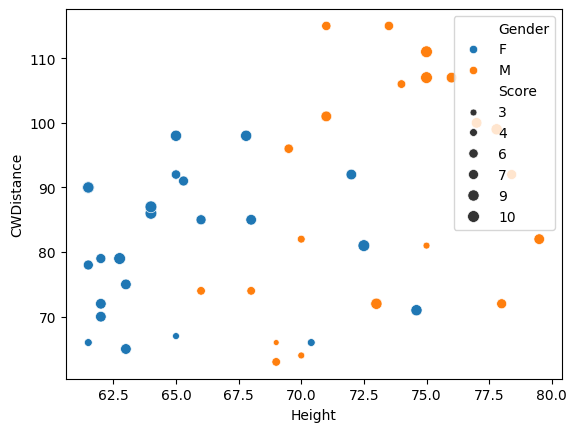

In [50]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers


sns.scatterplot(data = df, y = "CWDistance", x= "Height", hue = "Gender", size="Score")
plt.show()

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


In [77]:
# Import Dataset

iris_url = Ruta + "NotebooksProfessor/datasets/iris/iris.csv"
iris_dataset = pd.read_csv(iris_url, header=None)
iris_dataset.columns =['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'FlowerName']

iris_dataset.head()
iris_dataset.shape[0]

150

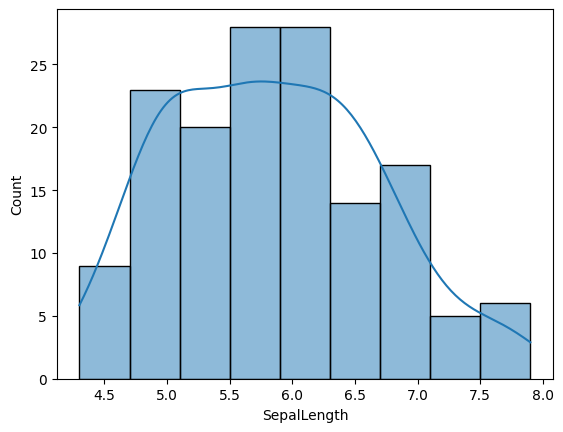

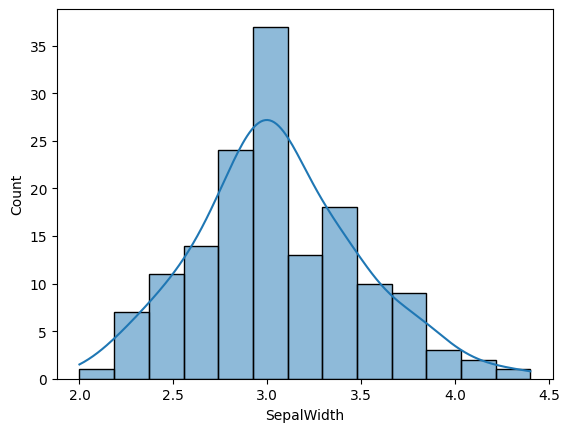

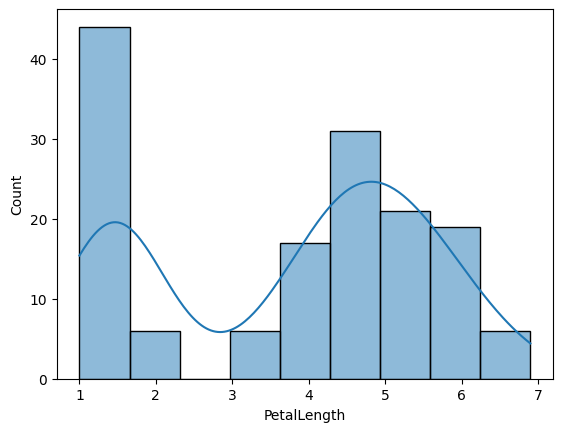

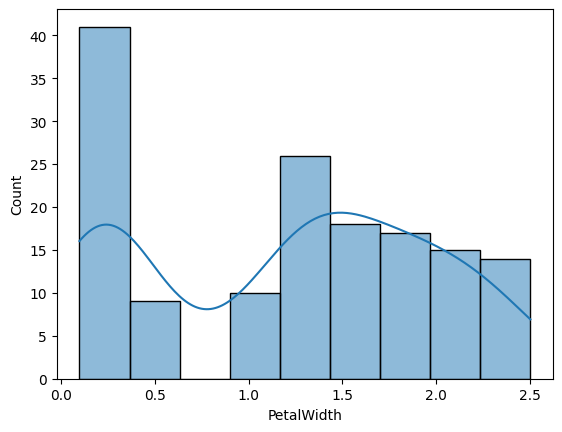

In [64]:
# 1. + 2. Plot the histograms for each of the four quantitative variables

sns.histplot(iris_dataset.SepalLength, kde = True)
plt.show()
sns.histplot(iris_dataset.SepalWidth, kde = True)
plt.show()
sns.histplot(iris_dataset.PetalLength, kde = True)
plt.show()
sns.histplot(iris_dataset.PetalWidth, kde = True)
plt.show()


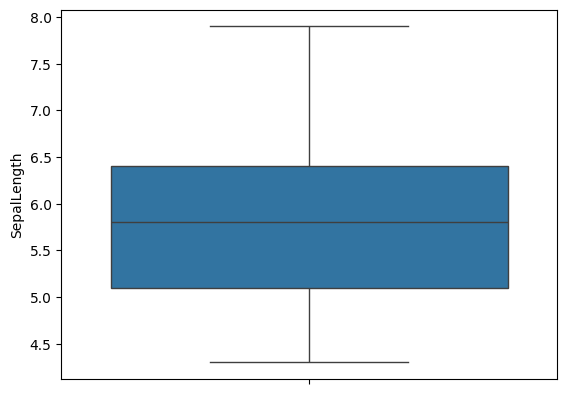

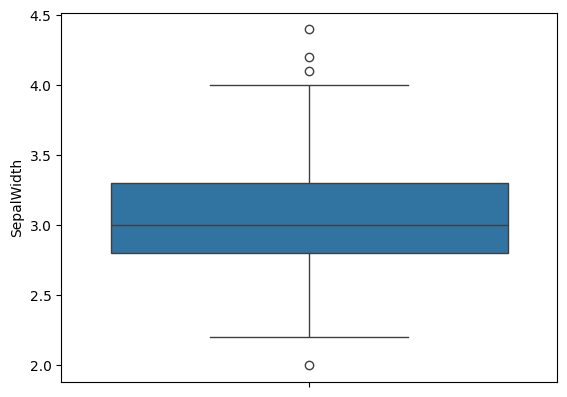

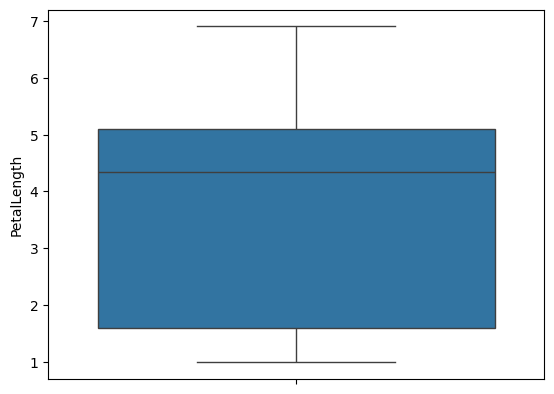

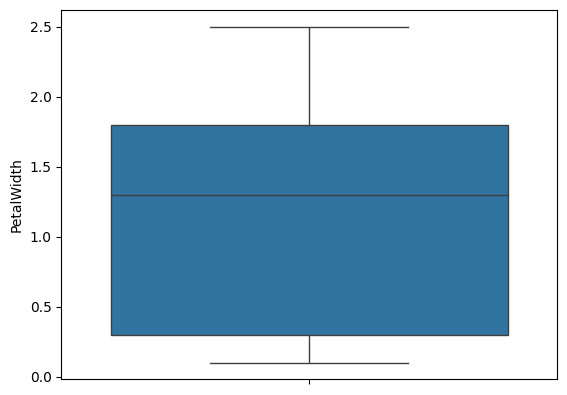

In [62]:
# 3. Plot the boxplots for each of the quantitative variables

for column in iris_dataset.columns[:-1]:
    sns.boxplot(iris_dataset[column])
    plt.show()

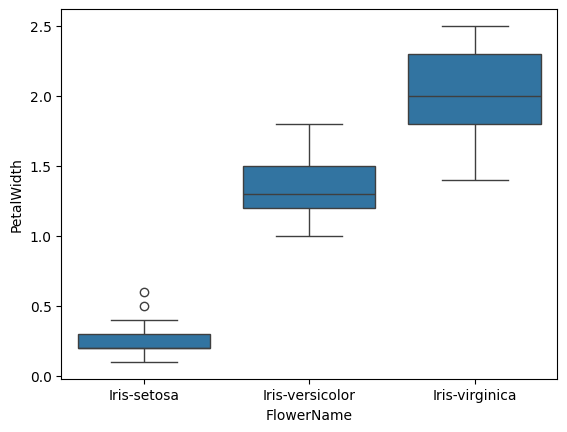

In [74]:
# 4. Plot the boxplots of the petal width grouped by type of flower

sns.boxplot(data = iris_dataset, x= "FlowerName", y= "PetalWidth")
plt.show()

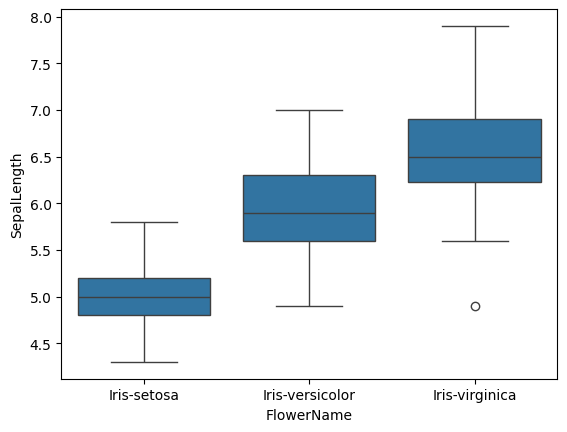

In [76]:
# 5. Plot the boxplots of the setal length grouped by type of flower


sns.boxplot(data = iris_dataset, x= "FlowerName", y= "SepalLength")
plt.show()

6. Provide a description (explaination from your observations) of each of the quantitative variables

- Petal Length:  Contamos con una media 4.4 cm, pero se tiene un gran rango de valores (de 1 a 7 cm), con una tendencia a los valores menores a 5cm. El histograma muestra que la moda es entre 1 - 1.4 cm a pesar de que el resto de los valores son mucho mayores (entre 4-6 cm). Los pétalos menos comunes son los de 2-3 cm.


- Petal Witdh: Podemos observar que dependiendo del tipo de flor contamos con un tamaño promedio distinto. las flores más pequeñas son *iris-setosa* seguidas por *iris-versicolor* y finalmente *iris-virginica*. Como lo muestra el diagramad de Cajas y Bigotes del ejercicio 4, podemos ver que conforme el tipo de flor crece, también su rango de longitud (distancia entre la media y el min/max). En el diagrama Cajas y Bigotes del ejercicio 3, podemos ver que la media es de 1.4 cm (similar a la media obtenida para *iris-versicolor*). El histograma nos muestra que realmente solo alrededor de 27 flores cuentan con esa medida. Por lo mismo, es mejor separar por grupos para poder obtener datos precisos.


- Sepal Length: En este caso podemos ver en el diagrama del ejercicio 5 que el order de tamaño sigue igual: *iris-setosa*, *iris-versicolor*, *iris-virginica*, pero a diferencia que en la variable pasada, el rango de longitud no es proporcional al tamaño de la flor. A excepción de *iris-setosa*, los rangos son similares para las demás flores. Al analizar el Sepal Lenght sin agrupaciones obtenemos una media de 5.7 cm, similar a la media de *iris-versicolor*. El histograma nos muestra que la mayoría de las flores estan en el rango de 5-6 cm.


- Sepal Widht: Al igual que con Petal Lenght, al tener menos diagramas y agrupaciones, las conclusiones son más generales. Podemos observar en el diagrama del ejercicio 3 que se cuenta con una media de 3 cm. El histograma nos muestra una distribución balanceada, donde tenemos una mayor cantidad de flores con medida de 3cm y conforme se aleja de este valor (positiva o negativamente) se disminuye la tendencia.